**RECOMMENDATION SYSTEM USING COLLEBRATIVE FITERING**






**Objectives**

1) Recommend the movies for a user

2) Movie Ratings Prediction



**THE MACHINE LEARNING ALGORITHM USED IN THIS STUDY IS KNN**

**LOADING THE DATA FROM DRIVE**

In [1]:
! gdown --id 1OQcL6-dRvMM2t8PjYnOkmNGVv78nddxs  #movies.csv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OQcL6-dRvMM2t8PjYnOkmNGVv78nddxs
To: /content/movies.csv
100% 494k/494k [00:00<00:00, 106MB/s]


In [2]:
! gdown --id 1dowqYW40EuKxLjP6cydnBKzjxFzEMPFb  #ratings.csv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dowqYW40EuKxLjP6cydnBKzjxFzEMPFb
To: /content/ratings.csv
100% 2.48M/2.48M [00:00<00:00, 178MB/s]


**OBJECTIVE-1**

In [3]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
movies1 = pd.read_csv("movies.csv")

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [9]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


**REPLACING THE "NAN" VALUES WITH ZEROS.**

In [10]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


**THE GLOBAL AVG RATING**

In [11]:
global_rating_AVG=sum(ratings.rating)/100835
print(global_rating_AVG)

3.5015917092279465


**GRAPHICAL REPRESTATION OF RATINGS**

<Axes: >

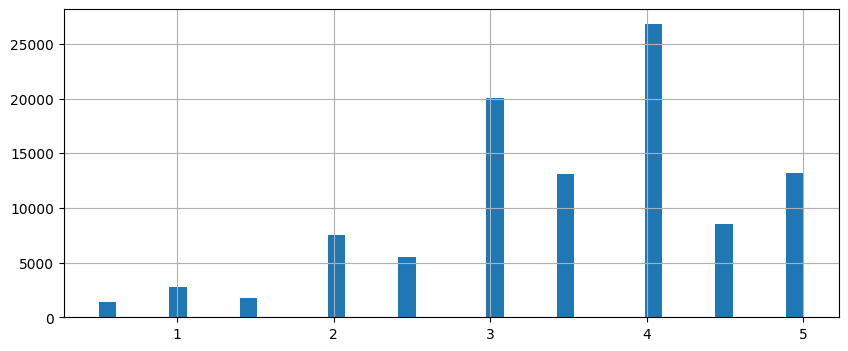

In [12]:
plt.figure(figsize =(10, 4))
ratings['rating'].hist(bins = 40)


In [13]:
# method to make y-axis more readable
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

<ipython-input-14-e66b2adda87b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])


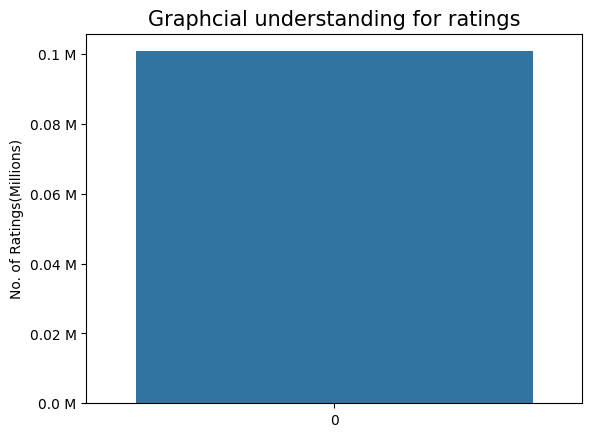

In [14]:
fig, ax = plt.subplots()
plt.title('Graphcial understanding for ratings', fontsize=15)
sns.countplot(ratings.rating)
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()

**THE STATISTICAL METRICS OF RATINGS**

In [15]:
ratings.describe()["rating"]

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

**REMOVING IF ANY DUPLICATE ENTRIES PRESENT**

In [16]:
dup_bool = ratings.duplicated(['movieId','userId','rating'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


**TOTAL NUMBER OF RATINGS,USERS AND MOVIES**

In [17]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",ratings.shape[0])
print("Total No of Users   :", len(np.unique(ratings.userId)))
print("Total No of movies  :", len(np.unique(ratings.movieId)))

Total data 
--------------------------------------------------

Total no of ratings : 100836
Total No of Users   : 610
Total No of movies  : 9724


**NUMBER OF RATED MOVIES PER USER**

In [18]:
no_of_rated_movies_per_user = ratings.groupby(by='userId')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()

userId
414    2698
599    2478
474    2108
448    1864
274    1346
Name: rating, dtype: int64

**NUMBER OF RATED MOVIES PER USER STATISTICAL METRIC**

In [19]:
no_of_rated_movies_per_user.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: rating, dtype: float64

**THE PDF AND CDF OF NUMBER OF RATINGS BY USER**

<ipython-input-20-4b8491848be7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
<ipython-input-20-4b8491848be7>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)


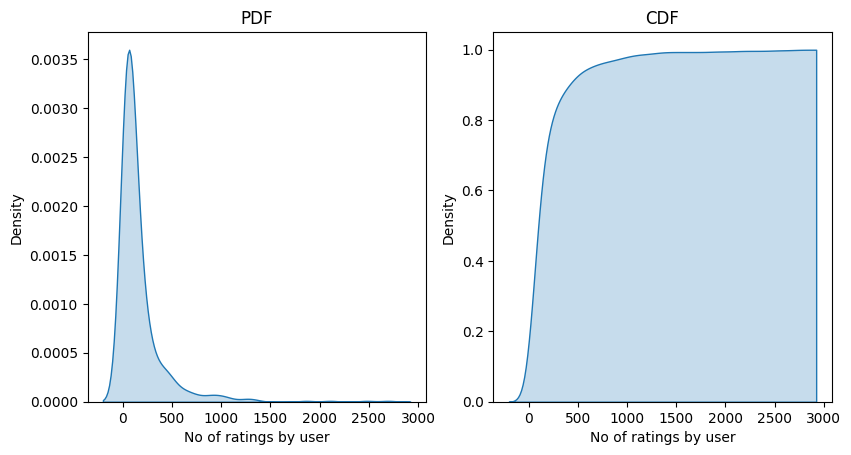

In [20]:
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

**THE QUANTILES OF RATINGS**

These is because to understand the data in more clear manner

In [21]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

In [22]:
quantiles[::5]

0.00      20
0.05      22
0.10      24
0.15      27
0.20      32
0.25      35
0.30      40
0.35      47
0.40      54
0.45      60
0.50      71
0.55      85
0.60     102
0.65     119
0.70     140
0.75     168
0.80     216
0.85     279
0.90     403
0.95     613
1.00    2698
Name: rating, dtype: int64

In [23]:
print('\n No of ratings at last 5 percentile : {}\n'.format(sum(no_of_rated_movies_per_user>= 749)) )


 No of ratings at last 5 percentile : 22



**NUMBER OF USERS VOTED ON MOVIES AND NUMBER OF MOVIES GOT VOTED BY THE USERS**  

In [25]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

In [26]:
no_user_voted

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

In [28]:
no_movies_voted

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

**GRAPH**

NO OF USERS VOTED **VS** MOVIE ID

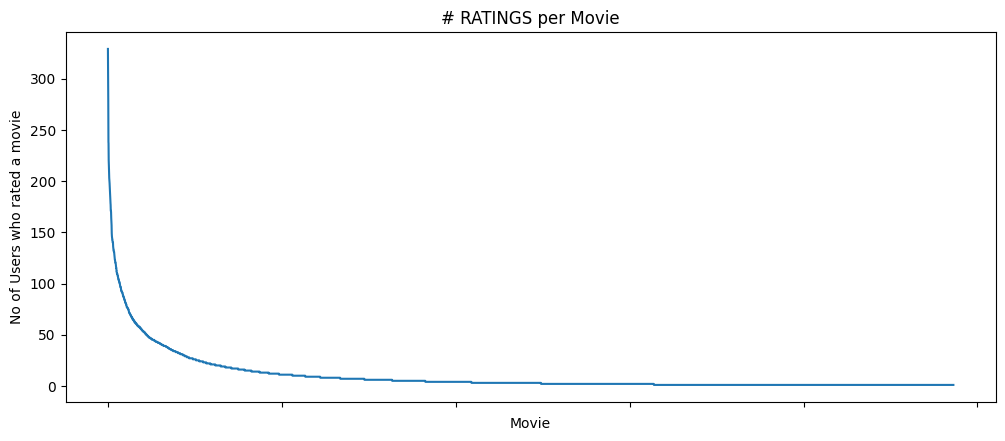

In [29]:
no_of_ratings_per_movie = ratings.groupby(by='movieId')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.4))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of Users who rated a movie')
ax.set_xticklabels([])

plt.show()

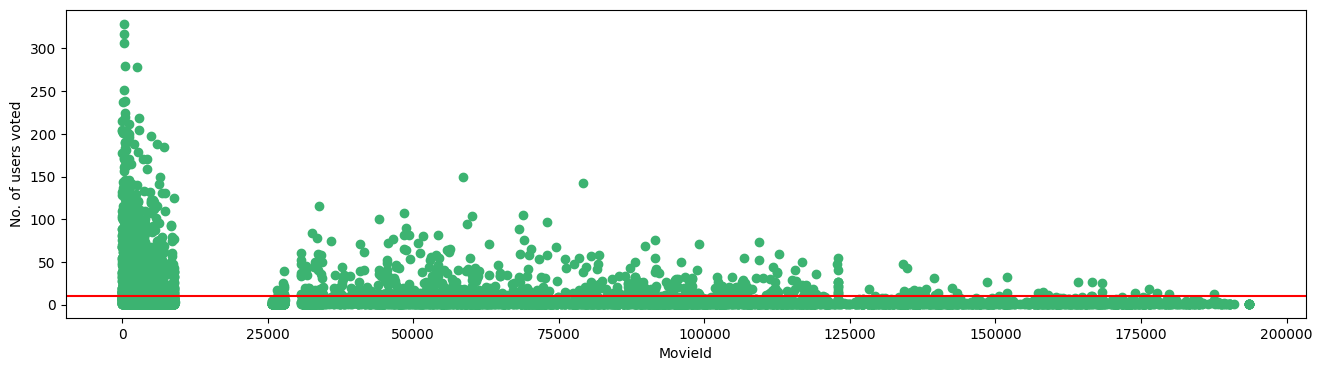

In [30]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

**GRAPH**

NO OF VOTES BY USER **VS** USER ID

In [31]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

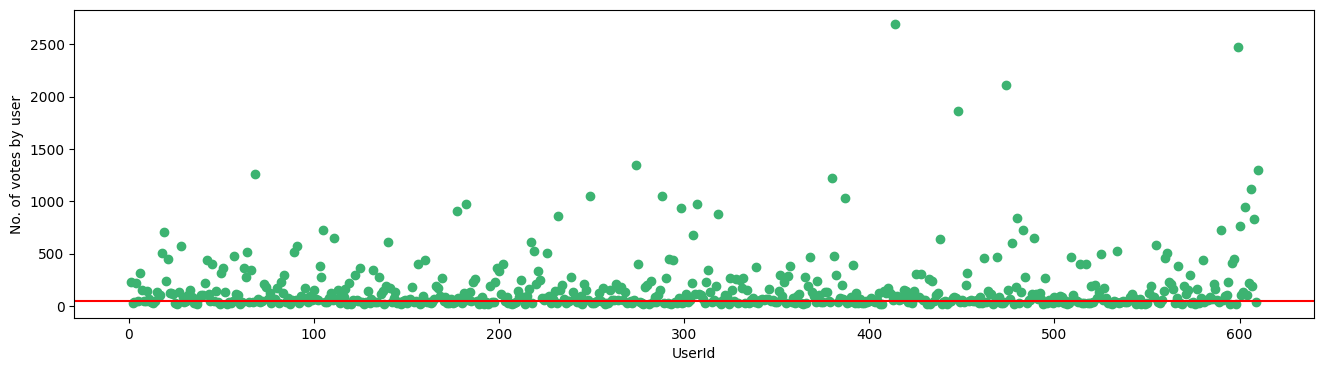

In [32]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()


**THE FINAL DATASET**

**REMOVING THE SPARSITY**

In [33]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [34]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [35]:
final_dataset

userId,movieId,1,2,3,4,5,6,7,8,9,...,601,602,603,604,605,606,607,608,609,610
0,1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
2,3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2117,176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2118,177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2119,179819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Implementing KNN WHERE K = 5**

In [36]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)

In [37]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [38]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [39]:
get_movie_recommendation('Iron Man')

,Title,Distance
1,Star Trek (2009),0.417513
2,Guardians of the Galaxy (2014),0.411029
3,Thor (2011),0.410508
4,Up (2009),0.403264
5,Batman Begins (2005),0.402929
6,Avatar (2009),0.375732
7,Iron Man 2 (2010),0.358014
8,"Avengers, The (2012)",0.341324
9,WALL·E (2008),0.332225
10,"Dark Knight, The (2008)",0.329462


In [40]:
get_movie_recommendation("Pulp Fiction")


,Title,Distance
1,Reservoir Dogs (1992),0.396045
2,Terminator 2: Judgment Day (1991),0.389716
3,Fargo (1996),0.389651
4,Fight Club (1999),0.376780
5,Braveheart (1995),0.372379
6,"Usual Suspects, The (1995)",0.327384
7,Forrest Gump (1994),0.314456
8,Seven (a.k.a. Se7en) (1995),0.302346
9,"Shawshank Redemption, The (1994)",0.297634
10,"Silence of the Lambs, The (1991)",0.290618


In [41]:
get_movie_recommendation('Toy Story')

,Title,Distance
1,Back to the Future (1985),0.469619
2,Groundhog Day (1993),0.465831
3,Mission: Impossible (1996),0.461087
4,Star Wars: Episode VI - Return of the Jedi (1983),0.458911
5,"Lion King, The (1994)",0.458855
6,Forrest Gump (1994),0.452904
7,Star Wars: Episode IV - A New Hope (1977),0.442612
8,Independence Day (a.k.a. ID4) (1996),0.435738
9,Jurassic Park (1993),0.434363
10,Toy Story 2 (1999),0.427399


In [42]:
get_movie_recommendation("Jurassic Park")

,Title,Distance
1,"Lion King, The (1994)",0.385153
2,True Lies (1994),0.380683
3,Apollo 13 (1995),0.371221
4,Independence Day (a.k.a. ID4) (1996),0.361582
5,Batman (1989),0.360504
6,Speed (1994),0.338268
7,"Fugitive, The (1993)",0.331196
8,Braveheart (1995),0.330546
9,Forrest Gump (1994),0.311741
10,Terminator 2: Judgment Day (1991),0.280017


In [43]:
get_movie_recommendation('Memento')

,Title,Distance
1,Donnie Darko (2001),0.434395
2,American History X (1998),0.427465
3,"Lord of the Rings: The Return of the King, The...",0.424384
4,Kill Bill: Vol. 2 (2004),0.422413
5,"Matrix, The (1999)",0.409884
6,"Lord of the Rings: The Two Towers, The (2002)",0.397019
7,Kill Bill: Vol. 1 (2003),0.395114
8,Eternal Sunshine of the Spotless Mind (2004),0.385666
9,"Lord of the Rings: The Fellowship of the Ring,...",0.378828
10,Fight Club (1999),0.330407



**MOVIE RATINGS PREDICTIONS**

In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [45]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
movies=pd.read_csv("movies.csv")

In [47]:
ratings=pd.read_csv("ratings.csv")

In [48]:
full_df = pd.concat([movies,ratings], axis=1)
full_df

,movieId,title,genres,userId,movieId,rating,timestamp
0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,4.0,964982703
1,2.0,Jumanji (1995),Adventure|Children|Fantasy,1,3,4.0,964981247
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,6,4.0,964982224
3,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance,1,47,5.0,964983815
4,5.0,Father of the Bride Part II (1995),Comedy,1,50,5.0,964982931
...,...,...,...,...,...,...,...
100831,NaN,NaN,NaN,610,166534,4.0,1493848402
100832,NaN,NaN,NaN,610,168248,5.0,1493850091
100833,NaN,NaN,NaN,610,168250,5.0,1494273047
100834,NaN,NaN,NaN,610,168252,5.0,1493846352


In [49]:
full_df=full_df.dropna()

In [50]:
full_df

,movieId,title,genres,userId,movieId,rating,timestamp
0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,4.0,964982703
1,2.0,Jumanji (1995),Adventure|Children|Fantasy,1,3,4.0,964981247
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,6,4.0,964982224
3,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance,1,47,5.0,964983815
4,5.0,Father of the Bride Part II (1995),Comedy,1,50,5.0,964982931
...,...,...,...,...,...,...,...
9737,193581.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,64,3481,4.0,1161520665
9738,193583.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,64,3489,3.0,1161559689
9739,193585.0,Flint (2017),Drama,64,3499,4.5,1161559601
9740,193587.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,64,3510,3.0,1161559646


**Implementation of Random Forest**

In [51]:
full_df = full_df.dropna(axis=1)
print(full_df)

       movieId                                      title  \
0          1.0                           Toy Story (1995)   
1          2.0                             Jumanji (1995)   
2          3.0                    Grumpier Old Men (1995)   
3          4.0                   Waiting to Exhale (1995)   
4          5.0         Father of the Bride Part II (1995)   
...        ...                                        ...   
9737  193581.0  Black Butler: Book of the Atlantic (2017)   
9738  193583.0               No Game No Life: Zero (2017)   
9739  193585.0                               Flint (2017)   
9740  193587.0        Bungo Stray Dogs: Dead Apple (2018)   
9741  193609.0        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  userId  movieId  rating  \
0     Adventure|Animation|Children|Comedy|Fantasy       1        1     4.0   
1                      Adventure|Children|Fantasy       1        3     4.0   
2                                

In [52]:
full_df = full_df.select_dtypes(exclude=['object'])
full_df=full_df.fillna(full_df.mean())
X = full_df.drop('timestamp',axis=1)
y = full_df['rating']

In [53]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
X_train1=X_train1.astype(int)
y_train1=y_train1.astype(int)
y_test1=y_test1.astype(int)

In [55]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train1, y_train1)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [56]:
y_pred1 = regressor.predict(X_test1)

In [57]:
df1=pd.DataFrame({'Actual':y_test1, 'Predicted':y_pred1})
df1

,Actual,Predicted
272,3,3.0
5665,2,2.0
3030,4,4.0
4015,5,5.0
8557,3,3.0
...,...,...
1329,3,3.0
9327,4,4.0
474,4,4.0
6396,5,5.0


In [58]:
df1 = df1.reset_index()

In [59]:
df1

,index,Actual,Predicted
0,272,3,3.0
1,5665,2,2.0
2,3030,4,4.0
3,4015,5,5.0
4,8557,3,3.0
...,...,...,...
2918,1329,3,3.0
2919,9327,4,4.0
2920,474,4,4.0
2921,6396,5,5.0


In [60]:
movies=movies.reset_index()

In [61]:
import pandas as pd
RF_Pred=pd.merge(df1, movies, on='index', how='outer')
RF_Pred.head()

,index,Actual,Predicted,movieId,title,genres
0,272,3.0,3.0,313,"Swan Princess, The (1994)",Animation|Children
1,5665,2.0,2.0,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller
2,3030,4.0,4.0,4054,Save the Last Dance (2001),Drama|Romance
3,4015,5.0,5.0,5673,Punch-Drunk Love (2002),Comedy|Drama|Romance
4,8557,3.0,3.0,116138,Leviathan (2014),Drama


In [62]:
# Calculate the absolute errors
errors = abs(y_pred1 - y_test1)

mape = 100 * (errors / y_test1)
# Calculate and display accuracy
acc_RD = 100 - np.mean(mape)
print('Accuracy:', round(acc_RD, 2), '%.')

Accuracy: 100.0 %.


In [63]:
acc_RD

100.0

In [64]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))


Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


**Implemantion of Decision Tree**

In [65]:
full_df = full_df.dropna(axis=1)
print(full_df)

       movieId  userId  movieId  rating   timestamp
0          1.0       1      1.0     4.0   964982703
1          2.0       1      3.0     4.0   964981247
2          3.0       1      6.0     4.0   964982224
3          4.0       1     47.0     5.0   964983815
4          5.0       1     50.0     5.0   964982931
...        ...     ...      ...     ...         ...
9737  193581.0      64   3481.0     4.0  1161520665
9738  193583.0      64   3489.0     3.0  1161559689
9739  193585.0      64   3499.0     4.5  1161559601
9740  193587.0      64   3510.0     3.0  1161559646
9741  193609.0      64   3526.0     4.0  1161566627

[9742 rows x 5 columns]


In [66]:
full_df = full_df.select_dtypes(exclude=['object'])
full_df=full_df.fillna(full_df.mean())
X = full_df.drop('timestamp',axis=1)
y = full_df['rating']

In [67]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=0)

In [68]:
import pandas as pd
import json
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [69]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train2.astype(int), y_train2.astype(int))

DecisionTreeClassifier()

In [70]:
X_train2=X_train2.astype(int)
y_train2=y_train2.astype(int)
y_test2=y_test2.astype(int)

In [71]:
y_pred2 = tree.predict(X_test2)

In [72]:
df2=pd.DataFrame({'Actual':y_test2, 'Predicted':y_pred2})
df2

,Actual,Predicted
272,3,3
5665,2,2
3030,4,4
4015,5,5
8557,3,3
...,...,...
1329,3,3
9327,4,4
474,4,4
6396,5,5


In [73]:
df2 = df2.reset_index()


In [74]:
import pandas as pd
DT_Pred=pd.merge(df2, movies, on='index', how='outer')
DT_Pred.head()

,index,Actual,Predicted,movieId,title,genres
0,272,3.0,3.0,313,"Swan Princess, The (1994)",Animation|Children
1,5665,2.0,2.0,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller
2,3030,4.0,4.0,4054,Save the Last Dance (2001),Drama|Romance
3,4015,5.0,5.0,5673,Punch-Drunk Love (2002),Comedy|Drama|Romance
4,8557,3.0,3.0,116138,Leviathan (2014),Drama


In [75]:
# Calculate the absolute errors
errors_DT = abs(y_pred2 - y_test2)

mape_DT = 100 * (errors / y_test2)

acc_DT = 100 - np.mean(mape)
print('Accuracy_DT:', round(acc_DT, 2), '%.')

Accuracy_DT: 100.0 %.


In [76]:
acc_DT

100.0

In [77]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))


Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


**Implemention KNN**

In [78]:
full_df = full_df.select_dtypes(exclude=['object'])
full_df=full_df.fillna(full_df.mean())
X = full_df.drop('timestamp',axis=1)
y = full_df['rating']

In [79]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=0)

In [80]:
full_df = full_df.dropna(axis=1)
print(full_df)

       movieId  userId  movieId  rating   timestamp
0          1.0       1      1.0     4.0   964982703
1          2.0       1      3.0     4.0   964981247
2          3.0       1      6.0     4.0   964982224
3          4.0       1     47.0     5.0   964983815
4          5.0       1     50.0     5.0   964982931
...        ...     ...      ...     ...         ...
9737  193581.0      64   3481.0     4.0  1161520665
9738  193583.0      64   3489.0     3.0  1161559689
9739  193585.0      64   3499.0     4.5  1161559601
9740  193587.0      64   3510.0     3.0  1161559646
9741  193609.0      64   3526.0     4.0  1161566627

[9742 rows x 5 columns]


In [81]:
X_train3=X_train3.astype(int)
y_train3=y_train3.astype(int)
y_test3=y_test3.astype(int)

In [82]:
# applying standard scale method
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# scaling training and testing data set
X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)

In [83]:
# importing KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# K value set to be 10
classifer = KNeighborsClassifier(n_neighbors=10)

# model training
classifer.fit(X_train3,y_train3)

# testing the model
y_pred= classifer.predict(X_test3)

In [84]:
y_pred3 = classifer.predict(X_test3)

In [85]:
df3=pd.DataFrame({'Actual':y_test3, 'Predicted':y_pred3})
df3

,Actual,Predicted
272,3,4
5665,2,2
3030,4,4
4015,5,5
8557,3,3
...,...,...
1329,3,3
9327,4,4
474,4,4
6396,5,5


In [86]:
df3 = df3.reset_index()


In [87]:
import pandas as pd
Knn_Pred=pd.merge(df3, movies, on='index', how='outer')
Knn_Pred.head()

,index,Actual,Predicted,movieId,title,genres
0,272,3.0,4.0,313,"Swan Princess, The (1994)",Animation|Children
1,5665,2.0,2.0,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller
2,3030,4.0,4.0,4054,Save the Last Dance (2001),Drama|Romance
3,4015,5.0,5.0,5673,Punch-Drunk Love (2002),Comedy|Drama|Romance
4,8557,3.0,3.0,116138,Leviathan (2014),Drama


In [88]:
# importing accuracy_score
from sklearn.metrics import accuracy_score

# printing accuracy
acc_KNN=(accuracy_score(y_test3,y_pred3)*100)
acc_KNN=print(accuracy_score(y_test3,y_pred3)*100)



90.31816626753336


In [89]:
acc_KNN=(accuracy_score(y_test3,y_pred3)*100)

In [90]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test3, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test3, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

Mean Absolute Error: 0.09716045159083134
Mean Squared Error: 0.09784468012316114
Root Mean Squared Error: 0.3128013429049836


**Implementation using Gausian Naive Bayes**

In [91]:
full_df = full_df.select_dtypes(exclude=['object'])
full_df=full_df.fillna(full_df.mean())
X = full_df.drop('timestamp',axis=1)
y = full_df['rating']

In [92]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.3, random_state=0)

In [93]:
X_train4=X_train4.astype(int)
y_train4=y_train4.astype(int)
y_test4=y_test4.astype(int)

In [94]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train4, y_train4)

GaussianNB()

In [95]:
y_pred4 = gnb.predict(X_test4)

In [96]:
df4=pd.DataFrame({'Actual':y_test4, 'Predicted':y_pred4})
df4

,Actual,Predicted
272,3,3
5665,2,3
3030,4,4
4015,5,4
8557,3,4
...,...,...
1329,3,3
9327,4,4
474,4,3
6396,5,4


In [97]:
df4=df4.reset_index()
df4

,index,Actual,Predicted
0,272,3,3
1,5665,2,3
2,3030,4,4
3,4015,5,4
4,8557,3,4
...,...,...,...
2918,1329,3,3
2919,9327,4,4
2920,474,4,3
2921,6396,5,4


In [98]:
import pandas as pd
Naive_Pred=pd.merge(df4, movies, on='index', how='outer')
Naive_Pred.head()

,index,Actual,Predicted,movieId,title,genres
0,272,3.0,3.0,313,"Swan Princess, The (1994)",Animation|Children
1,5665,2.0,3.0,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller
2,3030,4.0,4.0,4054,Save the Last Dance (2001),Drama|Romance
3,4015,5.0,4.0,5673,Punch-Drunk Love (2002),Comedy|Drama|Romance
4,8557,3.0,4.0,116138,Leviathan (2014),Drama


In [99]:
from sklearn import metrics
acc_gaussian = metrics.accuracy_score(y_test4, y_pred4)*100
acc_gaussian=print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test4, y_pred4)*100)


Gaussian Naive Bayes model accuracy(in %): 46.86965446459118


In [100]:
acc_gaussian = metrics.accuracy_score(y_test4, y_pred4)*100

In [101]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test4, y_pred4))
print('Mean Squared Error:', metrics.mean_squared_error(y_test4, y_pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test4, y_pred4)))

Mean Absolute Error: 0.61033185083818
Mean Squared Error: 0.7957577830995552
Root Mean Squared Error: 0.8920525674530371


**MODEL ---- SCORE**

In [102]:
models = pd.DataFrame({"Model":["KNN","NaiveBayes","Decision Tree","Random Forest"],
                       "Score":[acc_KNN,acc_gaussian,acc_DT,acc_RD]})
models.sort_values(by="Score",ascending=False)

,Model,Score
2,Decision Tree,100.000000
3,Random Forest,100.000000
0,KNN,90.318166
1,NaiveBayes,46.869654
